In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\asus\Downloads\archive (5)\heart.csv")  
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

print("Accuracy:", dt.score(X_test_scaled, y_test))

Accuracy: 0.9853658536585366


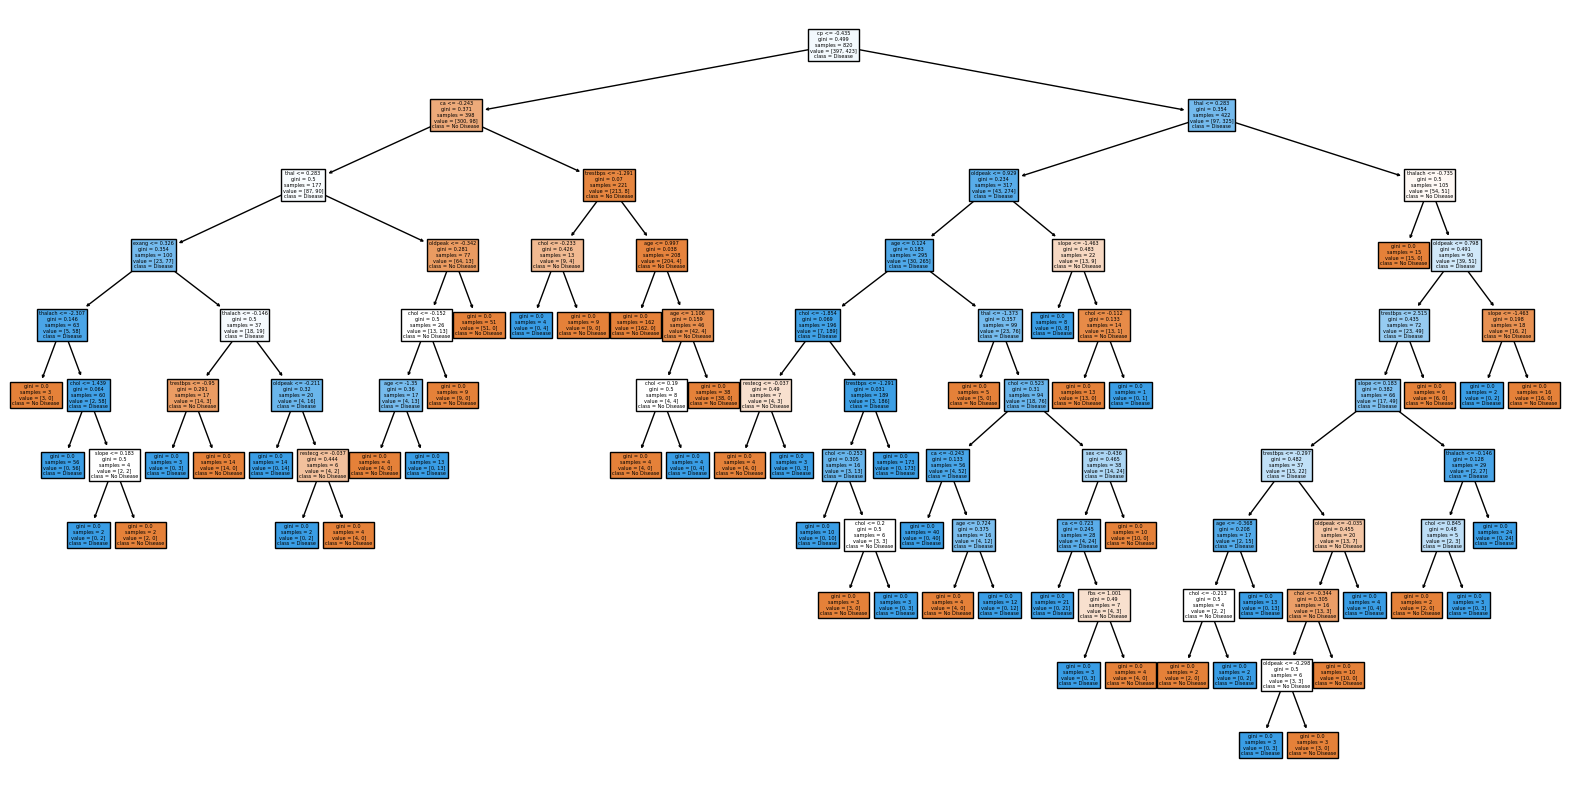

In [5]:
plt.figure(figsize=(20,10))
plot_tree(
    dt,
    feature_names=X.columns.tolist(),  # <-- FIXED
    class_names=["No Disease", "Disease"],
    filled=True
)
plt.show()

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [8]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average CV Accuracy:", scores.mean())

Cross-validation scores: [1.         1.         1.         1.         0.98536585]
Average CV Accuracy: 0.9970731707317073
